Original Dataset (First 5 Rows):
   Col_1  Col_2  Col_3  Col_4  Col_5  Col_6  Col_7  Col_8  Col_9  Col_10  ...  \
0    103    180     93     15    107     72    189     21    103     122  ...   
1     89     49     59    170    188     15    190    190    175     190  ...   
2     92    111    188    199    172      8    175     35     81     164  ...   
3     40     82    111     53     24    154    188    124     41     157  ...   
4    135     72     12    162     33     48    151     62     37      99  ...   

   Col_21  Col_22  Col_23  Col_24  Col_25  Col_26  Col_27  Col_28  Col_29  \
0      88     158      38     130     192     188      21     161      58   
1      18     132      89      60      14       9      90      53     130   
2     146      44     162     190      14      95      48      15     200   
3     139      81     136     163     163      33     123       5      41   
4     103      27     137      15      90      42     124     179      63   

   Col_30  
0    

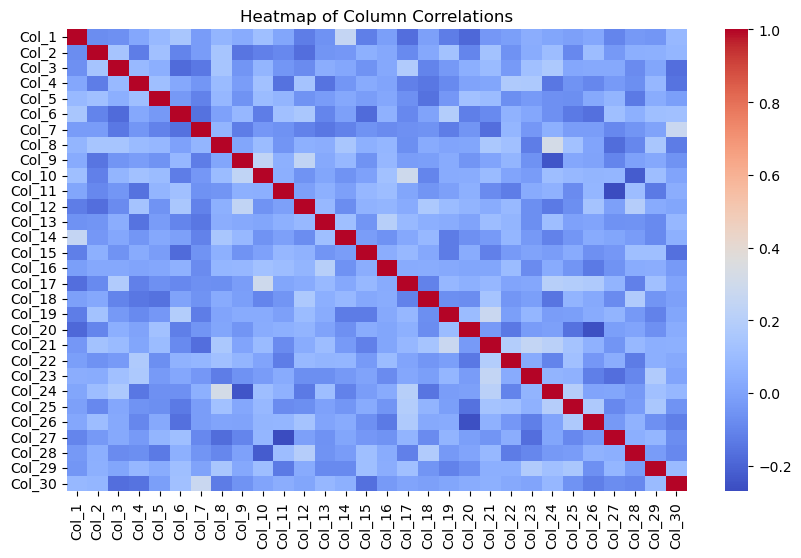


Number of column correlations ≤ 0.7: 840

Normalized Dataset (0–10 Range, First 5 Rows):
      Col_1     Col_2     Col_3      Col_4     Col_5     Col_6     Col_7  \
0  5.102041  8.963731  4.595960   6.385415  5.329949  3.585859  9.641026   
1  4.387755  6.085426  5.457742   8.527919  9.441624  6.064113  9.692308   
2  4.540816  5.388601  9.393939  10.000000  8.629442  0.353535  8.923077   
3  6.485555  3.886010  5.505051   6.385415  6.031006  7.727273  9.589744   
4  6.734694  3.367876  5.457742   8.121827  6.031006  6.064113  7.692308   

      Col_8     Col_9    Col_10  ...    Col_21    Col_22    Col_23    Col_24  \
0  5.514559  5.179487  6.102564  ...  4.416244  7.889447  6.161543  6.548223   
1  9.497487  8.871795  9.589744  ...  6.317125  6.582915  4.336735  6.233355   
2  5.514559  4.051282  8.256410  ...  7.360406  6.135407  8.061224  9.593909   
3  6.180905  6.233690  7.897436  ...  7.005076  4.020101  6.734694  8.223350   
4  3.065327  6.233690  4.923077  ...  5.177665  6.135

C:\Users\akhil\AppData\Local\Temp\ipykernel_20160\63198212.py:49: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  binary_data = normalized_data.applymap(lambda x: 0 if x <= 5 else 1)


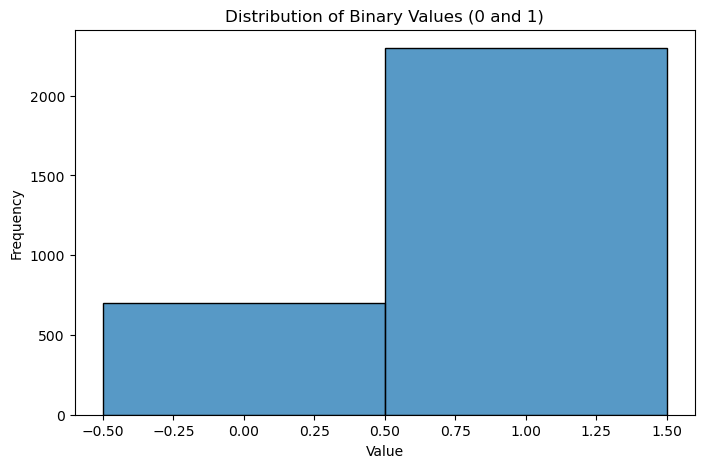

In [1]:
# Q1
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create a random dataset of 100 rows × 30 columns (values between [1,200])
np.random.seed(42)
data = pd.DataFrame(np.random.randint(1, 201, size=(100, 30)), columns=[f'Col_{i+1}' for i in range(30)])

print("Original Dataset (First 5 Rows):")
print(data.head())

# Replace all values between [10,60] with NaN
data_masked = data.mask((data >= 10) & (data <= 60))

# Count of NAs in each row and column
na_rows = data_masked.isna().sum(axis=1)
na_cols = data_masked.isna().sum(axis=0)

print("\nCount of NAs in Each Row:")
print(na_rows.head())
print("\nCount of NAs in Each Column:")
print(na_cols)

# Replace NA values with the average of each column
data_filled = data_masked.fillna(data_masked.mean())

# Plot Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data_filled.corr(), cmap="coolwarm", annot=False)
plt.title("Heatmap of Column Correlations")
plt.show()

# Count number of columns having correlation <= 0.7
corr_matrix = data_filled.corr()
count_low_corr = (corr_matrix.abs() <= 0.7).sum().sum()  # Count total correlations <= 0.7
# Remove self-correlations (diagonal = 1)
count_low_corr -= len(corr_matrix)
print(f"\nNumber of column correlations ≤ 0.7: {count_low_corr}")

# Normalize each column between 0 and 10
normalized_data = (data_filled - data_filled.min()) / (data_filled.max() - data_filled.min()) * 10

print("\nNormalized Dataset (0–10 Range, First 5 Rows):")
print(normalized_data.head())

# Replace all values with 0 if <=5, else 1
binary_data = normalized_data.map(lambda x: 0 if x <= 5 else 1)

print("\nBinary Transformed Dataset (0 if ≤5 else 1, First 5 Rows):")
print(binary_data.head())

# Visualize distribution
plt.figure(figsize=(8, 5))
sns.histplot(binary_data.values.flatten(), bins=2, discrete=True)
plt.title("Distribution of Binary Values (0 and 1)")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()
